In [1]:
# Importación de librerías necesarias para el análisis exploratorio
import pandas as pd                 # Manipulación de datos tabulares
import numpy as np                  # Operaciones numéricas avanzadas
import matplotlib.pyplot as plt     # Gráficos básicos
import seaborn as sns               # Gráficos estadísticos avanzados
import os                           # Acceso a archivos y directorios

# Configuración de gráficos para una visualización clara
sns.set(style="whitegrid")          # Estilo claro y limpio para gráficos


In [2]:
# Carga del dataset simulado desde la carpeta de datos
data_path = "../data/raw/sensor_data.csv"    # Ruta al archivo CSV simulado
df = pd.read_csv(data_path)                  # Lectura del archivo CSV en un DataFrame de Pandas

# Vista previa de los primeros registros
df.head(10)                                  


,timestamp,temperatura,vibracion,presion,falla
0,2024-01-01 00:00:00,72.48,2.79,28.64,0
1,2024-01-01 01:00:00,69.31,2.77,29.39,0
2,2024-01-01 02:00:00,73.24,2.10,28.81,0
3,2024-01-01 03:00:00,77.62,2.83,30.22,0
4,2024-01-01 04:00:00,68.83,3.37,32.39,0
5,2024-01-01 05:00:00,68.83,2.36,28.46,0
6,2024-01-01 06:00:00,77.90,3.52,32.00,0
7,2024-01-01 07:00:00,73.84,3.24,28.44,0
8,2024-01-01 08:00:00,67.65,2.63,28.30,0
9,2024-01-01 09:00:00,72.71,2.93,31.64,0


In [3]:
# Información general sobre columnas, tipos de datos y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5000 non-null   object 
 1   temperatura  5000 non-null   float64
 2   vibracion    5000 non-null   float64
 3   presion      5000 non-null   float64
 4   falla        5000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 195.4+ KB


In [4]:
# Estadísticas descriptivas para variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatura,5000.0,70.028004,4.982466,53.79,66.71,70.07,73.33,89.63
vibracion,5000.0,2.995074,0.505234,1.04,2.66,2.99,3.34,4.76
presion,5000.0,30.021084,1.997617,23.25,28.68,30.02,31.35,36.86
falla,5000.0,0.046800,0.211231,0.00,0.00,0.00,0.00,1.00


In [5]:
# Verificación de datos faltantes en cada columna
missing_values = df.isnull().sum()

# Si hay columnas con datos faltantes, se grafica; si no, se notifica que no hay datos faltantes
if missing_values.sum() > 0:
    missing_values[missing_values > 0].plot(kind='bar', color='skyblue')
    plt.title("Cantidad de Datos Faltantes por Variable")
    plt.xlabel("Variables")
    plt.ylabel("Número de valores faltantes")
    plt.show()
else:
    print("✅ No hay datos faltantes en el dataset.")

✅ No hay datos faltantes en el dataset.


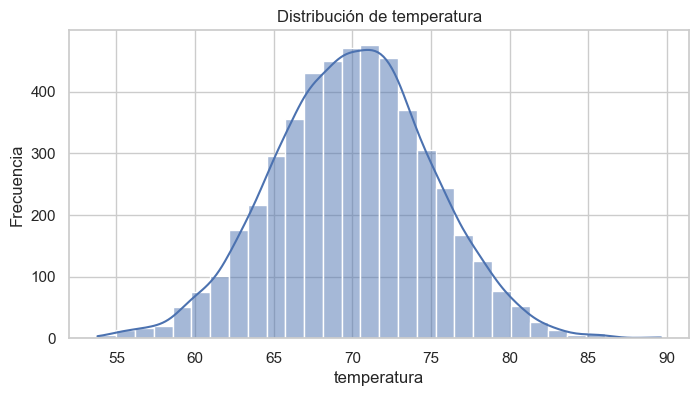

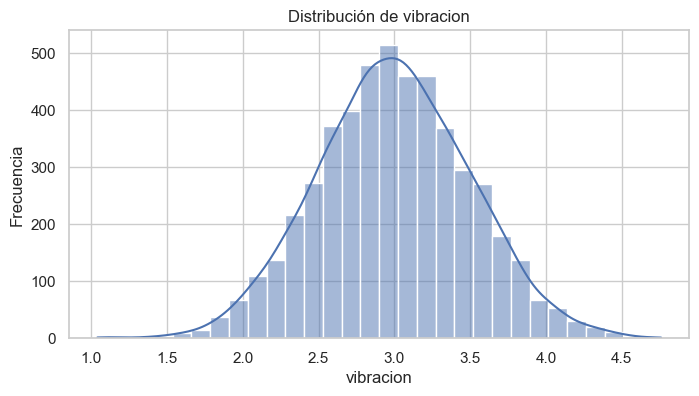

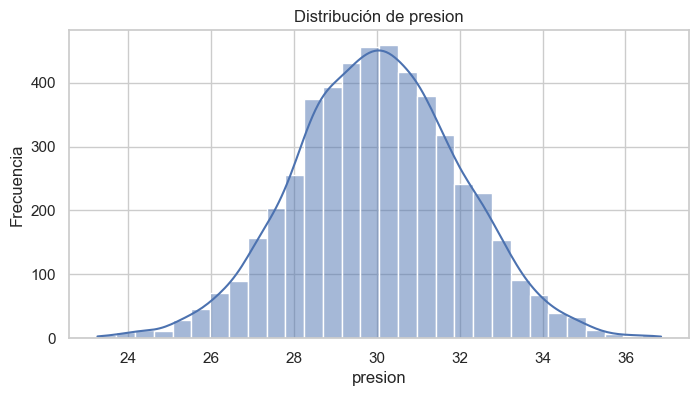

In [6]:
# Gráficos de distribución para variables clave (temperatura, vibración, presión)
variables_clave = ['temperatura', 'vibracion', 'presion']

for col in variables_clave:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()
